In [1]:
import pandas
import matplotlib.pyplot as plt

enade2017=pandas.read_csv("datasets\MICRODADOS_ENADE_2017.txt", sep=';',dtype={"DS_VT_ESC_OFG": str, 
                                                                               'DS_VT_ESC_OCE':str,
                                                                              'DS_VT_ACE_OCE':str,
                                                                              'NT_GER':str,
                                                                              'NT_FG':str,
                                                                              'NT_OBJ_FG':str,
                                                                              'NT_DIS_FG':str,
                                                                              'NT_CE':str,
                                                                              'NT_OBJ_CE':str,
                                                                              'NT_DIS_CE':str})
enade2017.shape

(537436, 150)

In [2]:
enade2017.columns[0:10]

Index(['NU_ANO', 'CO_IES', 'CO_CATEGAD', 'CO_ORGACAD', 'CO_GRUPO', 'CO_CURSO',
       'CO_MODALIDADE', 'CO_MUNIC_CURSO', 'CO_UF_CURSO', 'CO_REGIAO_CURSO'],
      dtype='object')

In [3]:
'''
nota geral: 0-98 
CO_CATEGAD: categoria administrativa da IES
1 - Federal
2 - Estadual
3 - Municipal
4 - Privada com fins lucrativos
5 - Privada sem fins lucrativos
7 - Especial

CO_GRUPO> area de enquadramento do curso no Enade
4004 - Ciência da Computação (Bacharelado)

CO_REGIAO_CURSO: regiao do curso
1 = Norte
2 = Nordeste
3 = Sudeste
4 = Sul
5 = Centro-Oeste

'''

tabela = pandas.DataFrame(enade2017, columns=['NT_GER', 'CO_CATEGAD', 'CO_GRUPO', 'CO_REGIAO_CURSO'])
tabela.head(20)

,NT_GER,CO_CATEGAD,CO_GRUPO,CO_REGIAO_CURSO
0,"52,6",1,5710,5
1,"63,1",1,5710,5
2,"33,7",1,5710,5
3,"58,1",1,5710,5
4,"46,3",1,5710,5
5,"64,2",1,5710,5
6,"41,4",1,5710,5
7,"48,8",1,5710,5
8,"52,9",1,5710,5
9,"62,7",1,5710,5


In [4]:
##limpeza dos dados

#substitui vírgula por ponto
tabela['NT_GER'] = tabela['NT_GER'].str.replace(',', '.')
#retira os nulos (não fez a prova)
tabela=tabela.loc[(tabela['NT_GER'].notnull())]
#converte de str para float
tabela['NT_GER'] = pandas.to_numeric(tabela['NT_GER'])
print(tabela['NT_GER'])
print(tabela['NT_GER'].mean())

0         52.6
1         63.1
2         33.7
3         58.1
4         46.3
5         64.2
6         41.4
7         48.8
8         52.9
9         62.7
10        51.9
11        58.4
12        77.7
13        37.5
14        66.4
15        71.5
16        57.8
17        62.7
18        75.1
19        50.5
20        46.1
21        44.1
22        47.9
23        55.1
24        73.5
25        60.4
26        62.7
27        49.5
28        44.9
29        27.7
          ... 
534887    43.8
534888    46.9
534890    48.2
534891    49.6
534892    63.2
534893    31.9
534895    71.5
534896    59.6
534897    15.1
534898    44.7
534900    30.8
534901    16.3
534902    66.3
534903    34.9
534904    71.9
534905    56.0
534906    45.9
534907    43.3
534908    68.4
534909    39.3
534910    69.6
534911    53.8
534912    15.2
534913    59.8
534914    42.7
534915    35.6
534916    66.1
534917    70.2
534918    51.9
534919    52.8
Name: NT_GER, Length: 449932, dtype: float64
43.52396851079471


In [5]:
tabela['NT_GER'].describe()

count    449932.000000
mean         43.523969
std          14.080110
min           0.000000
25%          33.400000
50%          42.900000
75%          53.100000
max          98.100000
Name: NT_GER, dtype: float64

In [6]:
#apenas Ciência da Computação
ccomp = tabela[tabela['CO_GRUPO']==4004]
print(ccomp)
ccomp.NT_GER.describe()

        NT_GER  CO_CATEGAD  CO_GRUPO  CO_REGIAO_CURSO
383       58.7           1      4004                5
384       49.8           1      4004                5
386       40.1           1      4004                5
387       53.2           1      4004                5
388       52.4           1      4004                5
389       22.4           1      4004                5
390       53.3           1      4004                5
391       44.4           1      4004                5
392       66.0           1      4004                5
393       36.5           1      4004                5
394       32.1           1      4004                5
395       23.0           1      4004                5
396       55.8           1      4004                5
397       35.5           1      4004                5
398       39.5           1      4004                5
399       68.3           1      4004                5
400       46.5           1      4004                5
401       39.1           1  

count    8489.000000
mean       43.262775
std        13.633212
min         0.000000
25%        33.700000
50%        42.300000
75%        52.400000
max        95.100000
Name: NT_GER, dtype: float64

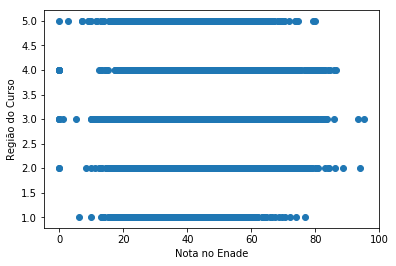

In [7]:
import matplotlib.pyplot as plt
#visualmente
plt.scatter( ccomp.NT_GER, ccomp.CO_REGIAO_CURSO)
plt.ylabel('Região do Curso')
plt.xlabel('Nota no Enade')
plt.show()

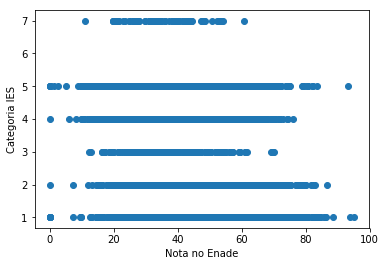

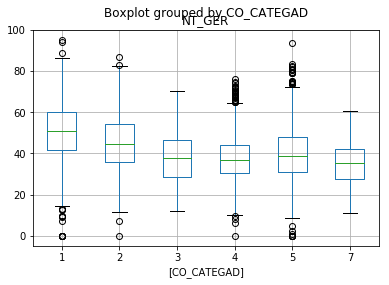

In [8]:
plt.scatter( ccomp.NT_GER, ccomp.CO_CATEGAD)
plt.ylabel('Categoria IES')
plt.xlabel('Nota no Enade')
plt.show()


categad = pandas.DataFrame(ccomp, columns=['NT_GER', 'CO_CATEGAD'])
categad.boxplot(by='CO_CATEGAD')

In [9]:
#nota geral agrupada pela categoria
ccomp['NT_GER'].groupby(ccomp['CO_CATEGAD']).describe()

,count,mean,std,min,25%,50%,75%,max
CO_CATEGAD,,,,,,,,
1,2706.0,50.699815,13.312321,0.0,41.525,51.10,60.175,95.1
2,970.0,45.210206,13.429972,0.0,35.900,44.80,54.500,86.5
3,174.0,38.467816,12.374690,12.3,28.725,37.70,46.575,70.1
4,2094.0,37.584384,10.722355,0.0,30.600,36.80,44.200,76.0
5,2469.0,39.734305,12.545465,0.0,31.100,39.00,47.900,93.3
7,76.0,35.671053,10.281022,11.0,27.700,35.45,42.125,60.7


(0.9972330331802368, 8.453469490632415e-05)
(0.986635684967041, 0.6103805303573608)


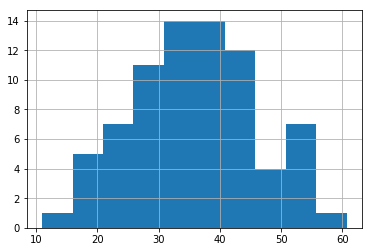

In [10]:
#teste das suposições
import scipy.stats as stats

print(stats.shapiro(categad.NT_GER.loc[categad.CO_CATEGAD ==1]))

print(stats.shapiro(categad.NT_GER.loc[categad.CO_CATEGAD ==7]))

#a saída do teste é o valor W e o p-value
#Considera-se que a suposição não é violada quando o p-value é maior que alpha, normalmente 0.05

#pelo histograma, também é possível observar a distribuição dos dados. 
categad.NT_GER.loc[categad.CO_CATEGAD ==7].hist()

In [11]:
# teste não paramétrico são métodos que não assumem uma distribuição específica para os dados.
stat, p = stats.mannwhitneyu(categad.NT_GER.loc[categad.CO_CATEGAD ==1], categad.NT_GER.loc[categad.CO_CATEGAD ==7])

print('Mann-Whitney: Estatisticas=%.3f, p=%.3f' % (stat, p))

alpha = 0.05
if p > alpha:
	print('Mesma distribuição')
else:
	print('Distribução diferente')
    
    
stat, p = stats.kruskal(categad.NT_GER.loc[categad.CO_CATEGAD ==1], categad.NT_GER.loc[categad.CO_CATEGAD ==7])
print('Kruskal-Wallis: Estatisticas=%.3f, p=%.3f' % (stat, p))

if p > alpha:
	print('Mesma distribuição')
else:
	print('Distribução diferente')
    
#anova
stat, p = stats.f_oneway(categad.NT_GER.loc[categad.CO_CATEGAD ==1], categad.CO_CATEGAD.loc[categad.CO_CATEGAD ==7])
print('Anova: Estatisticas=%.3f, p=%.3f' % (stat, p))
if p > alpha:
	print('Mesma distribuição')
else:
	print('Distribução diferente')

Mann-Whitney: Estatisticas=38220.000, p=0.000
Distribução diferente
Kruskal-Wallis: Estatisticas=87.519, p=0.000
Distribução diferente
Anova: Estatisticas=818.679, p=0.000
Distribução diferente
